In [2]:
import os
for p in ["data/raw", "data/processed", "data/cleaned", "docs"]:
    os.makedirs(p, exist_ok=True)
print("✅ Folders created")


✅ Folders created


In [3]:
!ls


ai_job_dataset.csv  data  docs	sample_data


In [4]:
import pandas as pd

jobs_df = pd.read_csv("ai_job_dataset.csv")

# RAW (required)
jobs_df.to_csv("data/raw/kaggle_jobs_raw.csv", index=False)

# PROCESSED (required: CSV + JSON)
jobs_df.to_csv("data/processed/kaggle_jobs_processed.csv", index=False)
jobs_df.to_json("data/processed/kaggle_jobs_processed.json", orient="records", indent=2)

print("✅ Kaggle saved")
print("Shape:", jobs_df.shape)
jobs_df.head(3)


✅ Kaggle saved
Shape: (15000, 19)


,job_id,job_title,salary_usd,salary_currency,experience_level,employment_type,company_location,company_size,employee_residence,remote_ratio,required_skills,education_required,years_experience,industry,posting_date,application_deadline,job_description_length,benefits_score,company_name
0,AI00001,AI Research Scientist,90376,USD,SE,CT,China,M,China,50,"Tableau, PyTorch, Kubernetes, Linux, NLP",Bachelor,9,Automotive,2024-10-18,2024-11-07,1076,5.9,Smart Analytics
1,AI00002,AI Software Engineer,61895,USD,EN,CT,Canada,M,Ireland,100,"Deep Learning, AWS, Mathematics, Python, Docker",Master,1,Media,2024-11-20,2025-01-11,1268,5.2,TechCorp Inc
2,AI00003,AI Specialist,152626,USD,MI,FL,Switzerland,L,South Korea,0,"Kubernetes, Deep Learning, Java, Hadoop, NLP",Associate,2,Education,2025-03-18,2025-04-07,1974,9.4,Autonomous Tech


In [5]:
import requests, json

REMOTIVE_QUERY = "machine learning"

url = "https://remotive.com/api/remote-jobs"
r = requests.get(url, params={"search": REMOTIVE_QUERY}, timeout=60)
r.raise_for_status()
api_data = r.json()

# RAW JSON (required)
with open("data/raw/remotive_raw.json", "w", encoding="utf-8") as f:
    json.dump(api_data, f, ensure_ascii=False, indent=2)

# PROCESSED (CSV + JSON)
api_df = pd.json_normalize(api_data.get("jobs", []))
api_df.to_csv("data/processed/remotive_processed.csv", index=False)
api_df.to_json("data/processed/remotive_processed.json", orient="records", indent=2)

print("✅ Remotive API saved")
print("Rows:", len(api_df))
api_df.head(3)


✅ Remotive API saved
Rows: 2


,id,url,title,company_name,company_logo,category,tags,job_type,publication_date,candidate_required_location,salary,description,company_logo_url
0,2088622,https://remotive.com/remote-jobs/all-others/co...,Content Reviewer,TELUS Digital,https://remotive.com/job/2088622/logo,All others,"[android, go, ios, social media, AI/ML, divers...",part_time,2026-02-06T16:14:35,USA,14$/hour,"<p class=""MsoNormal""><span lang=""EN"">Looking f...",https://remotive.com/job/2088622/logo
1,2088613,https://remotive.com/remote-jobs/ai-ml/sr-staf...,Sr/Staff AI Engineer,BNSF Railway,https://remotive.com/job/2088613/logo,AI / ML,"[AWS, azure, cloud, data science, hadoop, java...",full_time,2026-01-23T21:23:08,USA,$165k - $300k,"<p style=""margin-bottom: 10px; line-height: 1....",https://remotive.com/job/2088613/logo


In [6]:
!pip -q install pytrends


In [7]:
from pytrends.request import TrendReq

KEYWORDS = ["AI jobs", "machine learning jobs", "data science jobs", "remote AI jobs", "LLM jobs"]

pytrends = TrendReq(hl="en-US", tz=0)
pytrends.build_payload(KEYWORDS, timeframe="today 5-y")

trends_df = pytrends.interest_over_time().reset_index()

# RAW (required)
trends_df.to_csv("data/raw/trends_raw.csv", index=False)

# PROCESSED (required: CSV + JSON)
trends_df.to_csv("data/processed/trends_processed.csv", index=False)
trends_df.to_json("data/processed/trends_processed.json", orient="records", indent=2)

print("✅ Trends saved")
print("Shape:", trends_df.shape)
trends_df.head(3)


/usr/local/lib/python3.12/dist-packages/pytrends/request.py:260: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(False)


✅ Trends saved
Shape: (262, 7)


,date,AI jobs,machine learning jobs,data science jobs,remote AI jobs,LLM jobs,isPartial
0,2021-02-14,1,1,2,0,0,False
1,2021-02-21,1,1,2,0,0,False
2,2021-02-28,1,1,2,0,0,False


In [8]:
print("RAW files:")
!ls data/raw

print("\nPROCESSED files:")
!ls data/processed


RAW files:
kaggle_jobs_raw.csv  remotive_raw.json	trends_raw.csv

PROCESSED files:
kaggle_jobs_processed.csv   remotive_processed.csv   trends_processed.csv
kaggle_jobs_processed.json  remotive_processed.json  trends_processed.json


In [9]:
readme_content = """
# AI620 Assignment 1 – AI Labor Markets ELT Pipeline

## Theme
AI Labor Markets: Job trends, salary distribution, and search demand.

## Data Sources
1. Kaggle AI Job Dataset (CSV)
2. Remotive Public Jobs API (JSON)
3. Google Trends (Time-Series)

## Project Structure
data/
    raw/        -> Raw extracted data
    processed/  -> Processed CSV + JSON
    cleaned/    -> Cleaned datasets (Part 2)

## How to Run
1. Upload ai_job_dataset.csv to Colab.
2. Run notebook cells sequentially.
3. Raw data will be stored in data/raw.
4. Processed data will be stored in data/processed.

## Configuration
- Remotive search keyword: "machine learning"
- Google Trends timeframe: "today 5-y"

## Assumptions
- Kaggle dataset is pre-cleaned but may contain missing salary values.
- API data may contain optional fields.
- Trends data is indexed search interest (0-100 scale).
"""

with open("README.md", "w") as f:
    f.write(readme_content)

print("✅ README.md created")


✅ README.md created


In [10]:
!ls


ai_job_dataset.csv  data  docs	README.md  sample_data


In [12]:
import pandas as pd

kaggle = pd.read_csv("data/processed/kaggle_jobs_processed.csv")
remotive = pd.read_csv("data/processed/remotive_processed.csv")
trends = pd.read_csv("data/processed/trends_processed.csv")

print("Kaggle:", kaggle.shape)
print("Remotive:", remotive.shape)
print("Trends:", trends.shape)



Kaggle: (15000, 19)
Remotive: (2, 13)
Trends: (262, 7)


In [13]:
def quality_report(df, name):
    print("\n==============================")
    print("DATASET:", name)
    print("==============================")
    print("Shape:", df.shape)
    print("Duplicate rows:", df.duplicated().sum())
    missing = df.isna().sum().sort_values(ascending=False)
    print("\nMissing values (top 10 columns):")
    print(missing.head(10))

quality_report(kaggle, "Kaggle AI Jobs (processed)")
quality_report(remotive, "Remotive API Jobs (processed)")



DATASET: Kaggle AI Jobs (processed)
Shape: (15000, 19)
Duplicate rows: 0

Missing values (top 10 columns):
job_id                0
job_title             0
salary_usd            0
salary_currency       0
experience_level      0
employment_type       0
company_location      0
company_size          0
employee_residence    0
remote_ratio          0
dtype: int64

DATASET: Remotive API Jobs (processed)
Shape: (2, 13)
Duplicate rows: 0

Missing values (top 10 columns):
id                             0
url                            0
title                          0
company_name                   0
company_logo                   0
category                       0
tags                           0
job_type                       0
publication_date               0
candidate_required_location    0
dtype: int64


In [14]:
kaggle_clean = kaggle.copy()

# 1) Remove duplicates (use job_id because it uniquely identifies postings)
kaggle_clean = kaggle_clean.drop_duplicates(subset=["job_id"])

# 2) Standardize date formats
kaggle_clean["posting_date"] = pd.to_datetime(kaggle_clean["posting_date"], errors="coerce")
kaggle_clean["application_deadline"] = pd.to_datetime(kaggle_clean["application_deadline"], errors="coerce")

# 3) Ensure numeric columns are numeric
kaggle_clean["salary_usd"] = pd.to_numeric(kaggle_clean["salary_usd"], errors="coerce")
kaggle_clean["years_experience"] = pd.to_numeric(kaggle_clean["years_experience"], errors="coerce")
kaggle_clean["remote_ratio"] = pd.to_numeric(kaggle_clean["remote_ratio"], errors="coerce")

# 4) Handle missing values (we will drop rows missing salary ONLY for salary-based analysis)
# Keep all rows in the cleaned dataset, but create a salary_ready view for salary plots later.
kaggle_salary_ready = kaggle_clean.dropna(subset=["salary_usd"])

print("Kaggle cleaned:", kaggle_clean.shape)
print("Kaggle salary_ready:", kaggle_salary_ready.shape)

# 5) Save cleaned dataset (required)
kaggle_clean.to_csv("data/cleaned/kaggle_cleaned.csv", index=False)


Kaggle cleaned: (15000, 19)
Kaggle salary_ready: (15000, 19)


In [15]:
kaggle_clean[["salary_usd", "years_experience", "remote_ratio", "benefits_score", "job_description_length"]].describe()


,salary_usd,years_experience,remote_ratio,benefits_score,job_description_length
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,115348.965133,6.253200,49.483333,7.504273,1503.314733
std,60260.940438,5.545768,40.812712,1.450870,576.127083
min,32519.000000,0.000000,0.000000,5.000000,500.000000
25%,70179.750000,2.000000,0.000000,6.200000,1003.750000
50%,99705.000000,5.000000,50.000000,7.500000,1512.000000
75%,146408.500000,10.000000,100.000000,8.800000,2000.000000
max,399095.000000,19.000000,100.000000,10.000000,2499.000000


In [16]:
remotive_clean = remotive.copy()

# Remove duplicates (prefer id if it exists)
if "id" in remotive_clean.columns:
    remotive_clean = remotive_clean.drop_duplicates(subset=["id"])
else:
    remotive_clean = remotive_clean.drop_duplicates()

# Standardize publication date if present
if "publication_date" in remotive_clean.columns:
    remotive_clean["publication_date"] = pd.to_datetime(remotive_clean["publication_date"], errors="coerce")

print("Remotive cleaned:", remotive_clean.shape)

# Save cleaned dataset (required)
remotive_clean.to_csv("data/cleaned/remotive_cleaned.csv", index=False)


Remotive cleaned: (2, 13)


In [17]:
remotive_clean.select_dtypes(include="number").describe()


,id
count,2.000000e+00
mean,2.088618e+06
std,6.363961e+00
min,2.088613e+06
25%,2.088615e+06
50%,2.088618e+06
75%,2.088620e+06
max,2.088622e+06


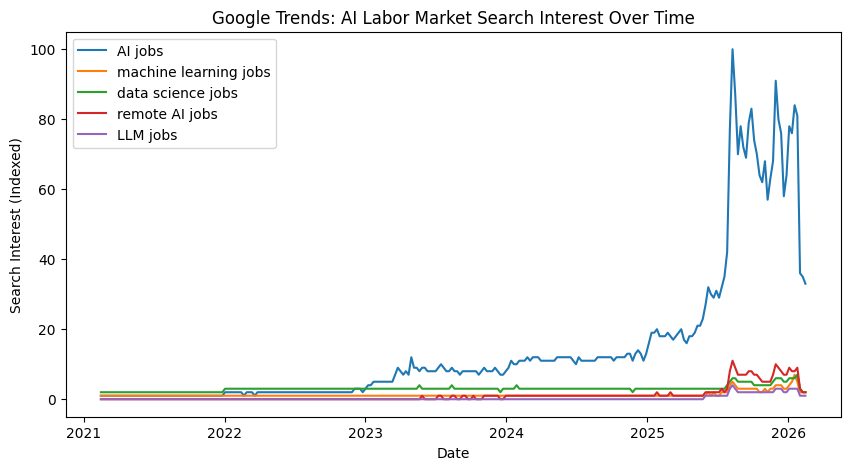

In [18]:
import matplotlib.pyplot as plt

tr = trends.copy()
tr["date"] = pd.to_datetime(tr["date"], errors="coerce")

plt.figure(figsize=(10,5))
for c in tr.columns:
    if c not in ["date", "isPartial"]:
        plt.plot(tr["date"], tr[c], label=c)

plt.title("Google Trends: AI Labor Market Search Interest Over Time")
plt.xlabel("Date")
plt.ylabel("Search Interest (Indexed)")
plt.legend()
plt.show()


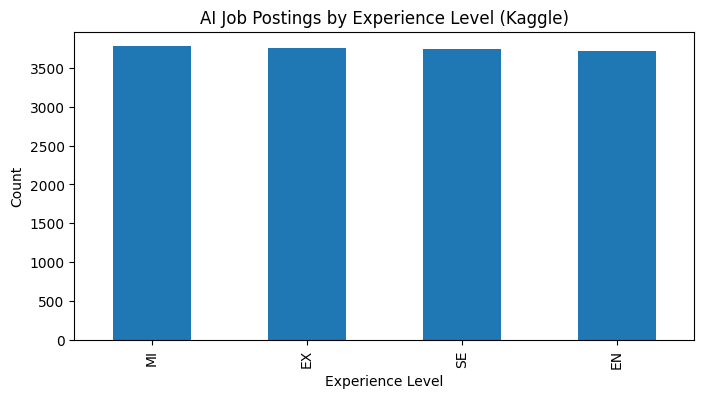

In [19]:
plt.figure(figsize=(8,4))
kaggle_clean["experience_level"].value_counts().plot(kind="bar")
plt.title("AI Job Postings by Experience Level (Kaggle)")
plt.xlabel("Experience Level")
plt.ylabel("Count")
plt.show()


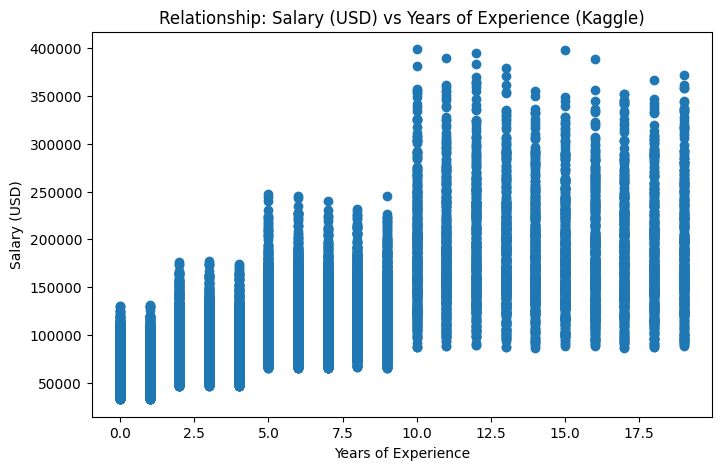

In [20]:
plt.figure(figsize=(8,5))
plt.scatter(kaggle_salary_ready["years_experience"], kaggle_salary_ready["salary_usd"])
plt.title("Relationship: Salary (USD) vs Years of Experience (Kaggle)")
plt.xlabel("Years of Experience")
plt.ylabel("Salary (USD)")
plt.show()


In [22]:
from google.colab import files

# Notebook: download manually from File -> Download -> .ipynb
# Data samples:
files.download("data/processed/kaggle_jobs_processed.csv")
files.download("data/processed/kaggle_jobs_processed.json")
files.download("data/processed/remotive_processed.csv")
files.download("data/processed/remotive_processed.json")
files.download("data/processed/trends_processed.csv")
files.download("data/processed/trends_processed.json")

files.download("data/cleaned/kaggle_cleaned.csv")
files.download("data/cleaned/remotive_cleaned.csv")

# Docs
files.download("README.md")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>